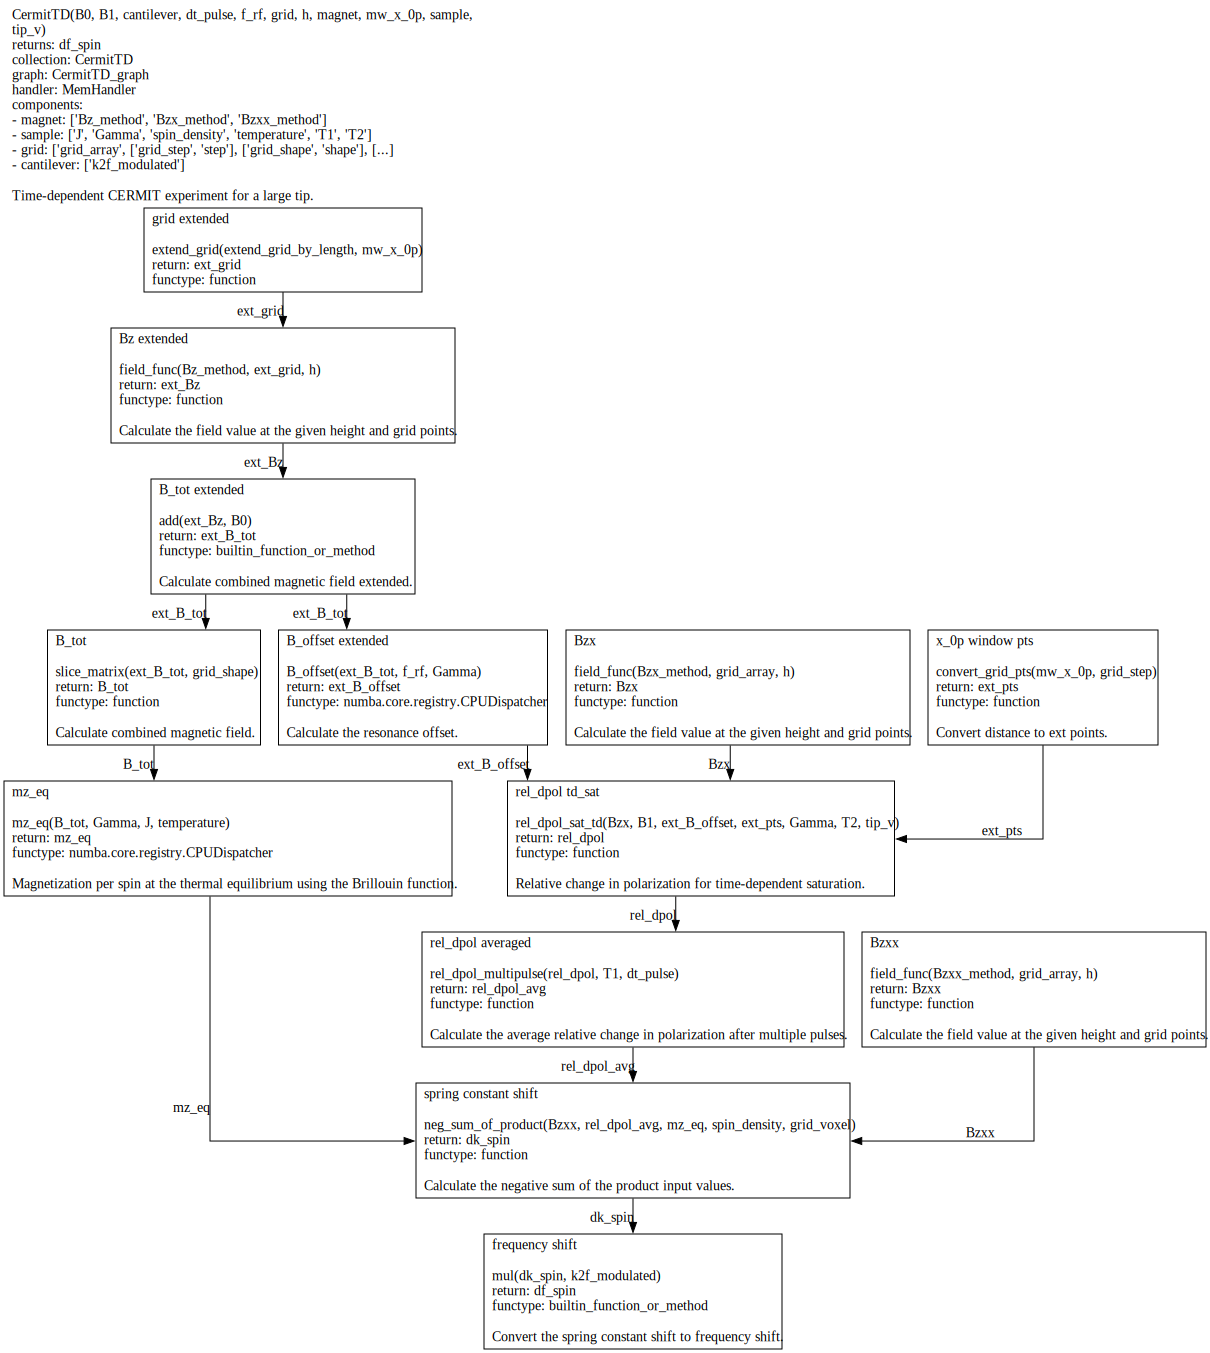

In [8]:
from mrfmsim.experiment import CermitTDCollection
from mrfmsim.plot import pvplots

# access the experiment model from the collection
CermitTD = CermitTDCollection["CermitTD"]

# define the plotting function
def plot_rel_dpol(rel_dpol_avg, grid, h, B0):
    """Plot the sensitive slice and save it to png."""
    p = pvplots.volume(rel_dpol_avg, grid, off_screen=True, cmap="jet", opacity="linear")
    p.screenshot(f"rel_dpol_{round(h[1], 2)}nm_{round(B0, 2)}mT.png")
    p.close()

CermitTD.visualize()

In [23]:
from mrfmsim import Node

G = CermitTD.graph
H = G.subgraph(outputs=["rel_dpol_avg"])
H.add_edge("rel_dpol averaged", "plot")
H.set_node_object(Node("plot", plot_rel_dpol))
H.name = "CermitTD_plot_graph"
CermitTD_plot = CermitTD.edit(name="CermitTD_plot", graph=H, returns=None)

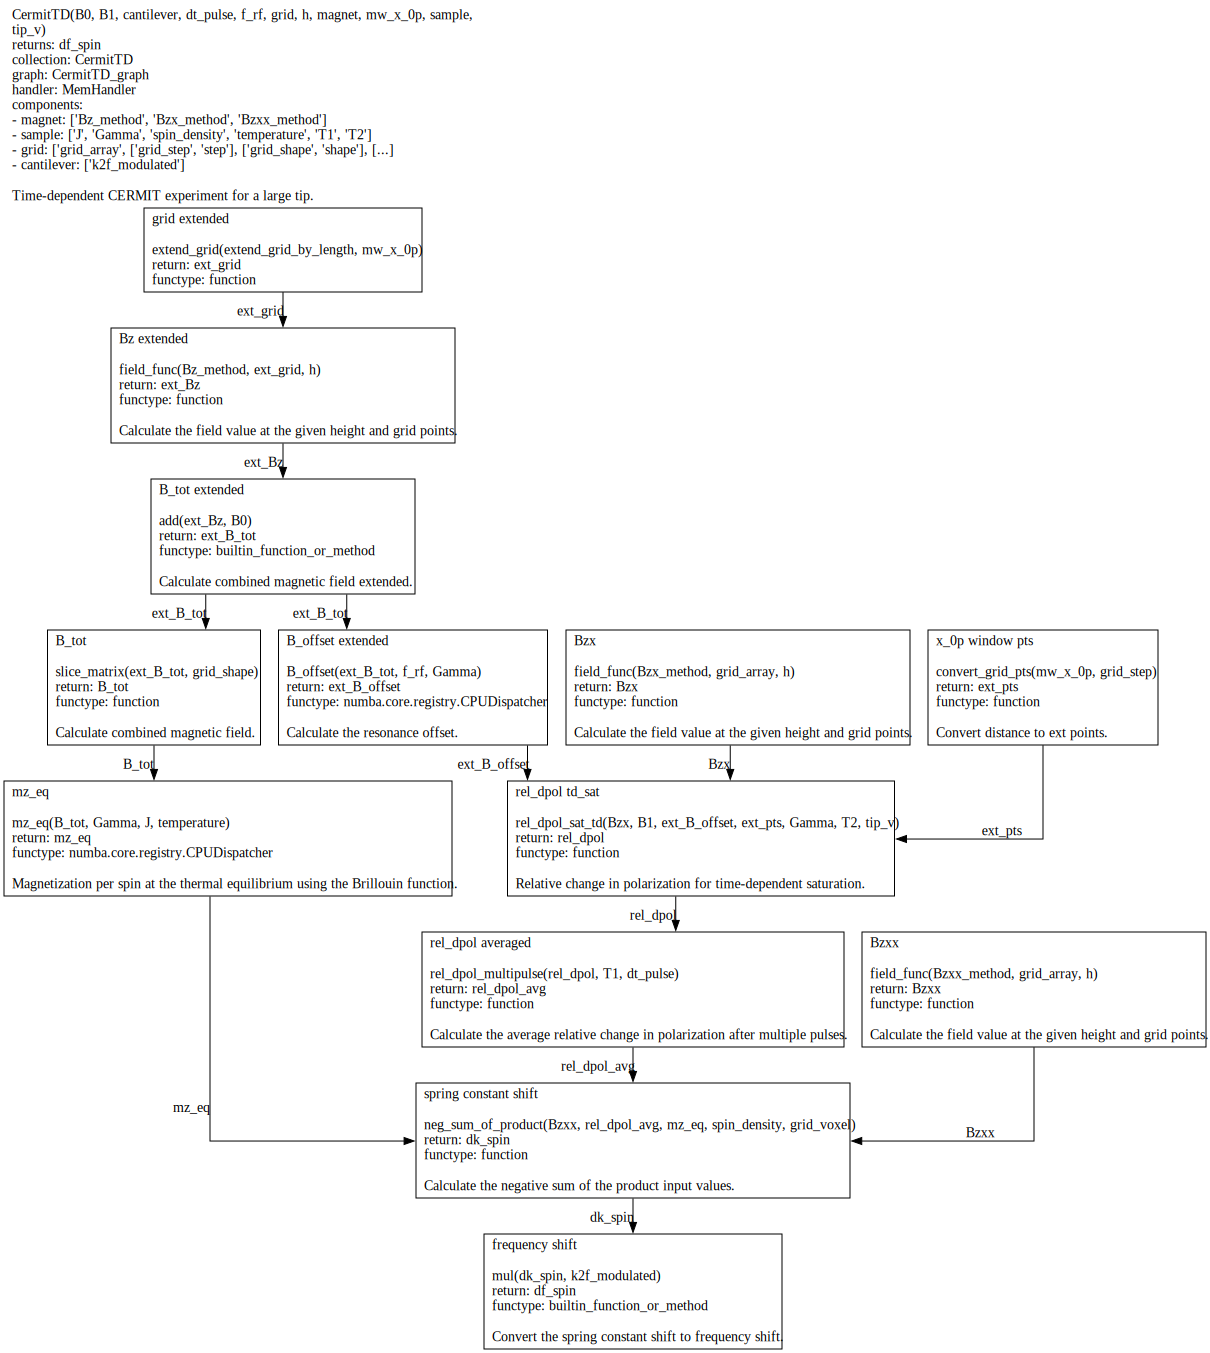

In [41]:
CermitTD.visualize(outfile="cp_mrfmsim_example_graph.pdf")

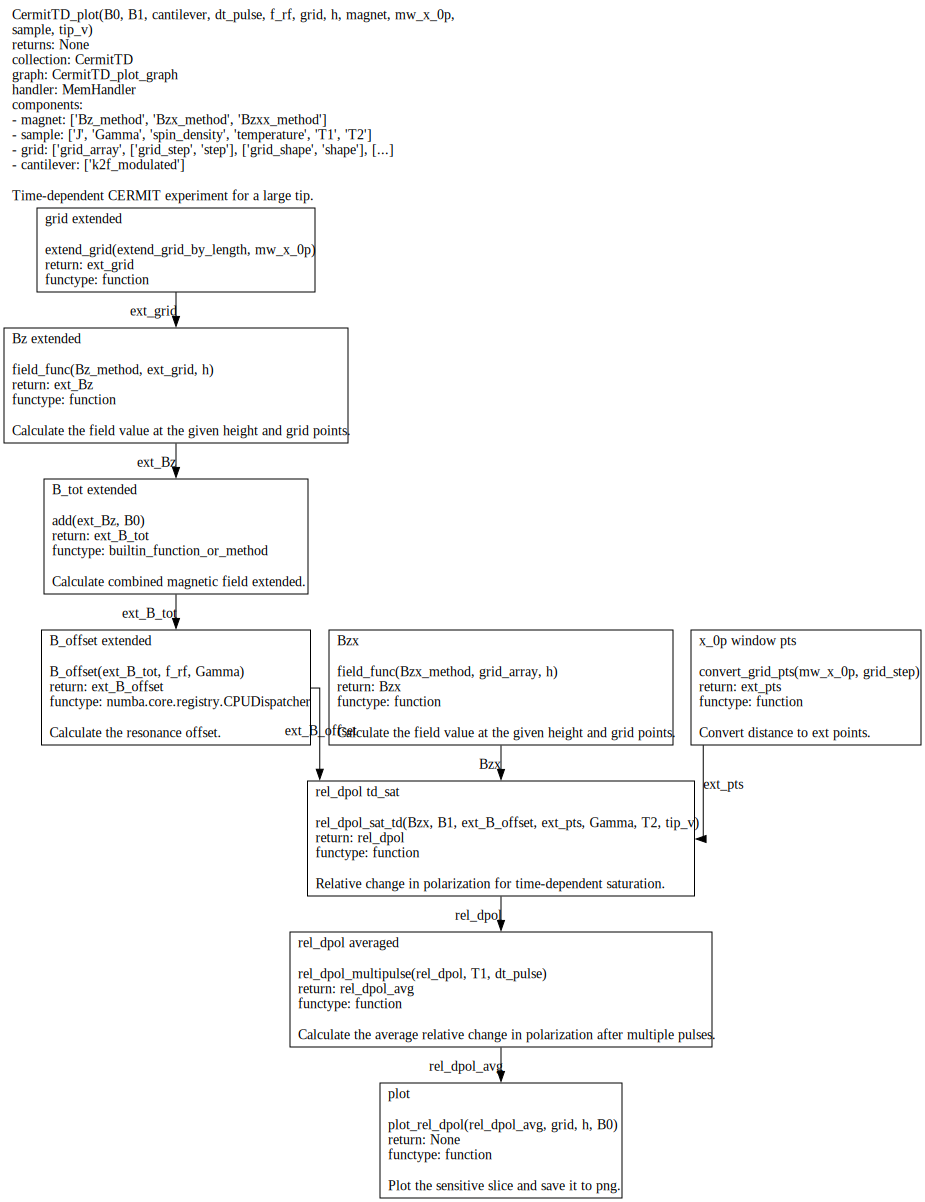

In [42]:
CermitTD_plot.visualize(outfile="cp_mrfmsim_example_graph_plot.pdf")

In [36]:
from mrfmsim.shortcut import loop_shortcut

CermitTD_plot_loop = loop_shortcut(CermitTD_plot, "f_rf", name="CermitTD_plot_loop")
CermitTD_plot_loop.graph.name = "CermitTD_plot_graph_looped"

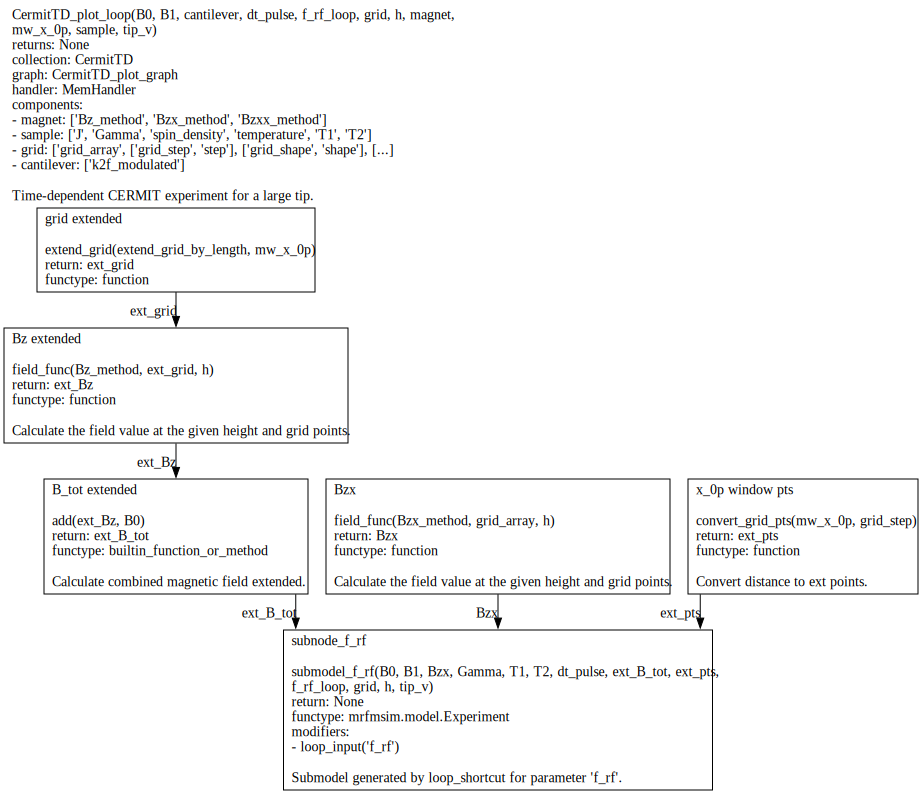

In [38]:
CermitTD_plot_loop.visualize(outfile="cp_mrfmsim_example_graph_loopped.pdf")